<a href="https://colab.research.google.com/github/Ware-Hard-or-Soft/ML-DL-projects/blob/main/PCA_for_genes_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PCA for genes analysis
If MIT and NUC form separate clusters, this suggests that the genes associated with these two classes have distinct characteristics, likely based on the gene expression features in the dataset.
If MIT and NUC overlap or are close, it indicates potential similarities in gene expression patterns, or the need for more distinctive features to separate them.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving yeast.csv to yeast.csv


In [23]:
from numpy import *
from matplotlib import pyplot as plt
import sys
import numpy as np
import pandas as pd

In [36]:

def loadDataSet(fileName):
    """
    Loads the dataset from a CSV file, handling non-numeric labels.

    Args:
        fileName (str): The path to the CSV file.

    Returns:
        tuple: A tuple containing the data matrix and label matrix.
    """
    dataMat = []
    labelMat = []

    # Read the CSV file using pandas to handle non-numeric data in the label column
    import pandas as pd
    from numpy import array
    df = pd.read_csv(fileName)

    # Assuming the last column is the label column
    label_column = df.columns[-1]

    # Extract data and labels
    dataMat = df.drop(columns=[label_column]).values.tolist()  # Exclude label column
    labelMat = df[label_column].values.tolist()

    dataMat = array(dataMat)
    labelMat = array(labelMat)
    return dataMat, labelMat

    label_column = df.columns[-1]

    # Extract data and labels
    dataMat = df.drop(columns=[label_column]).values.tolist()  # Exclude label column
    labelMat = df[label_column].values.tolist()

    dataMat = array(dataMat)
    labelMat = array(labelMat)
    return dataMat, labelMat



In [37]:
def pca(dataMat, PC_num=2):
    data_mean=dataMat.mean(axis=0)
    df=pd.DataFrame(dataMat)
    xp_df=df.subtract(data_mean)
    xp=xp_df.to_numpy()
    cov_xp=np.cov(xp.T)
    e,ev=np.linalg.eig(cov_xp)
    lowDDataMat=np.dot(xp,ev[:,:2])
    return array(lowDDataMat)

In [38]:
def plot(lowDDataMat, labelMat, figname):
    x = lowDDataMat[:, 0]
    y = lowDDataMat[:, 1]
    label = labelMat

    # Convert string labels to numerical values for color mapping
    unique_labels = np.unique(label)
    label_mapping = {label: i for i, label in enumerate(unique_labels)}
    numerical_labels = [label_mapping[l] for l in label]

    fig = plt.figure(figsize=(8, 8))
    plt.scatter(x, y, c=numerical_labels, cmap='rainbow')
    plt.title(figname)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

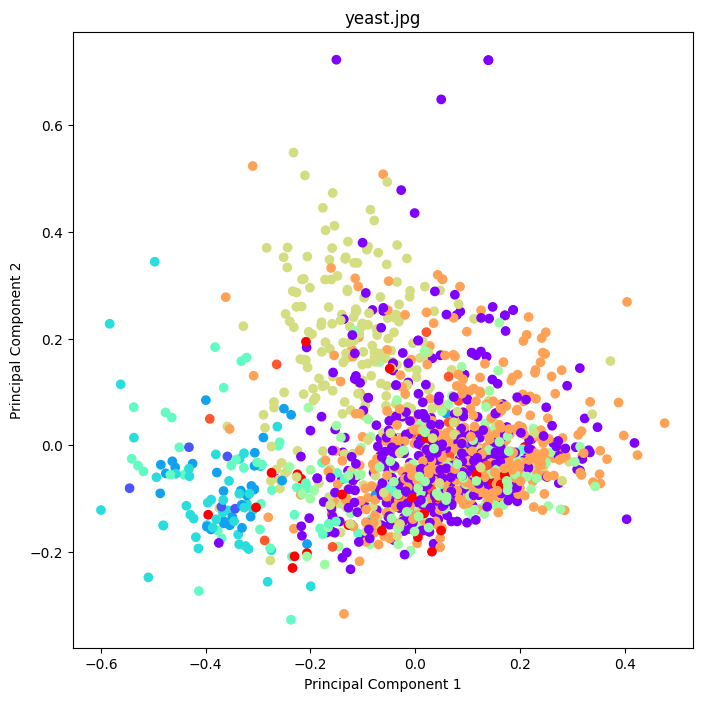

In [39]:
    filename = 'yeast.csv'
    figname = filename
    figname = figname.replace('csv','jpg')
    dataMat, labelMat = loadDataSet(filename)

    lowDDataMat = pca(dataMat)

    plot(lowDDataMat, labelMat, figname)